Plot time split



In [111]:
import pandas as pd
import matplotlib.pyplot as plt



time_split_age_random_forest = pd.read_csv('./time-splitting/percentage/age_inference_random_forest.csv', header=None)
time_split_age_logistic_regression = pd.read_csv('./time-splitting/percentage/age_inference_logistic_regression.csv', header=None)
time_split_age_random_forest_fixed = pd.read_csv('./time-splitting/fixed/age_inference_random_forest.csv', header=None)
time_split_age_logistic_regression_fixed = pd.read_csv('./time-splitting/fixed/age_inference_logistic_regression.csv', header=None)



time_split_gender_random_forest = pd.read_csv('./time-splitting/percentage/gender_inference_random_forest.csv', header=None)
time_split_gender_logistic_regression = pd.read_csv('./time-splitting/percentage/gender_inference_logistic_regression.csv', header=None)
time_split_gender_random_forest_fixed = pd.read_csv('./time-splitting/fixed/gender_inference_random_forest.csv', header=None)
time_split_gender_logistic_regression_fixed = pd.read_csv('./time-splitting/fixed/gender_inference_logistic_regression.csv', header=None)


time_split_age_random_forest.head(8)

,0,1,2,3,4,5
0,0.25,0.693959,0.693997,0.694019,0.694020,0.694020
1,0.50,0.753273,0.753159,0.753432,0.753181,0.753181
2,0.75,0.798300,0.798335,0.798356,0.798346,0.798346
3,1.00,0.810422,0.810433,0.810433,0.810433,0.810433


In [112]:
def perform_plot(rf, lr, rf_fixed, lr_fixed, metric, title):

    indices = range(rf.shape[0])
    labels = rf[0].to_list()
    indices_fixed = range(rf_fixed.shape[0])
    labels_fixed = rf_fixed[0].to_list()

    dff = pd.concat([rf[metric].to_frame(),lr[metric].to_frame()], axis=1)
    fixed_dff = pd.concat([rf_fixed[metric].to_frame(),lr_fixed[metric].to_frame()], axis=1)

    fig, ax1 = plt.subplots()
    plt.style.use('ggplot')

    ax1.set_xticks(indices)
    ax1.set_xticklabels(labels)
    dff.plot(kind='line', marker='o', ax=ax1)


    ax2 = ax1.twiny()
    fixed_dff.plot(kind='bar', ax=ax2)
    ax2.set_xticks(indices_fixed)
    ax2.set_xticklabels(labels_fixed)

    plt.title(title)
    ax1.get_legend().remove()
    ax2.legend(['Random Forest', 'Logistic Regression'], loc='lower right')







* Gender inference

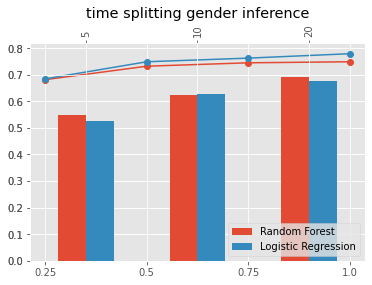

In [113]:
perform_plot(time_split_gender_random_forest, time_split_gender_logistic_regression,
             time_split_gender_random_forest_fixed, time_split_gender_logistic_regression_fixed, 1,
             'time splitting gender inference')

* Age inference

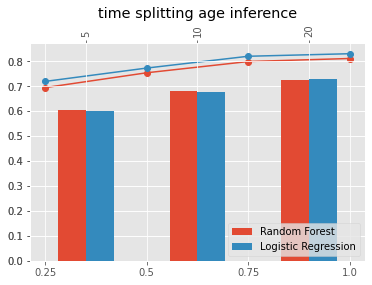

In [114]:
perform_plot(time_split_age_random_forest, time_split_age_logistic_regression,
             time_split_age_random_forest_fixed, time_split_age_logistic_regression_fixed,1,
             'time splitting age inference')